# Short Run Moving Average Strategy

In [156]:

# Import the required libraries with the usual shorthand notations where possible
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
#% matplotlib inline
import datetime
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
# Create a variable called end1 for today. Use the datetime library.
end1 = datetime.date(2025,8,6)
# Create a variable start1 which is 50 days before end1
start1 = end1 - pd.Timedelta(days = 59)
# The download should be into a pandas DataFrame called df
df = yf.download("NVDA",start = start1 , end = end1, interval = '5m',auto_adjust = False)
# Define the desired column order, now including 'Adj Close'
desired_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Filter and reorder columns, handling cases where a column might be missing
df = df[[col for col in desired_columns if col in df.columns]]

# Check the data type, the dimensions, the first few and last few rows of the pandas DataFrame
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())
# Create a copy of df called df1a. (We will manipulate and work with the df1a DataFrame.)
df1a = df.copy()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
(3084, 6)
Price                            Open        High         Low       Close  \
Ticker                           NVDA        NVDA        NVDA        NVDA   
Datetime                                                                    
2025-06-09 13:30:00+00:00  143.199997  144.699997  143.050003  144.429993   
2025-06-09 13:35:00+00:00  144.440002  144.589996  142.899994  143.125000   
2025-06-09 13:40:00+00:00  143.130005  143.559998  143.039993  143.350006   
2025-06-09 13:45:00+00:00  143.354996  143.880005  143.059998  143.651398   
2025-06-09 13:50:00+00:00  143.649994  143.985001  143.520004  143.940002   

Price                       Adj Close    Volume  
Ticker                           NVDA      NVDA  
Datetime                                         
2025-06-09 13:30:00+00:00  144.429993  16418488  
2025-06-09 13:35:00+00:00  143.125000   5853004  
2025-06-09 13:40:00+00:00  143.350006   3550520  
2025-06-09 13:45:00+00:00  143.6513

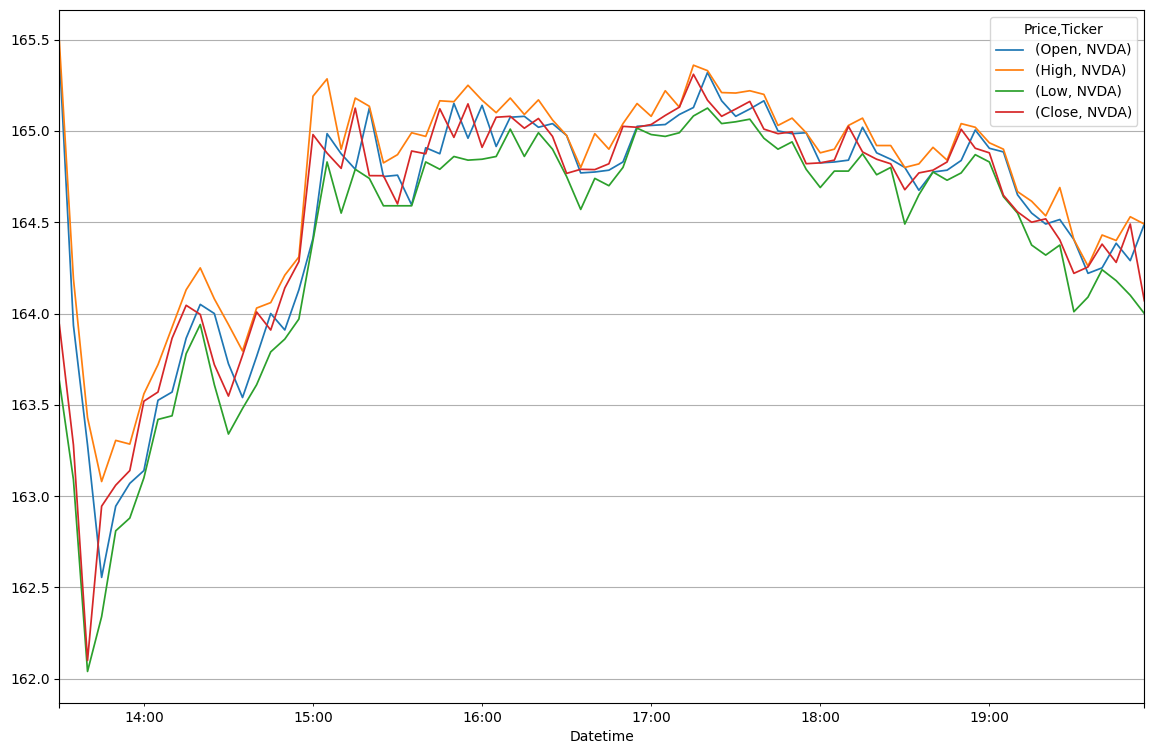

In [111]:


# Plot the 'Open', 'High', 'Low', Close' prices for 12 May 2020
df1a.loc["14 July 2025",["Open","High","Low","Close"]].plot(grid = True,linewidth=1.25, figsize=(14, 9))
plt.show()


# Delete the columns 'High', 'Low' and Volume' from df1a
df1a.drop(columns = ['High',"Low","Volume"],inplace = True)


Index(['Open_NVDA', 'Close_NVDA', 'Adj Close_NVDA'], dtype='object')

In [159]:
# Create a column called 'cc_returns' which shows returns between successive 'Close' prices
df1a[("cc_returns","")] = df1a[("Close","NVDA")].pct_change()
df1a[("ssma","")] = df1a[("Close","NVDA")].rolling(12).mean()
df1a

Price,Open,Close,Adj Close,cc_returns,ssma
Ticker,NVDA,NVDA,NVDA,,
Datetime,,,,,
2025-06-09 13:30:00+00:00,143.199997,144.429993,144.429993,NaN,NaN
2025-06-09 13:35:00+00:00,144.440002,143.125000,143.125000,-0.009035,NaN
2025-06-09 13:40:00+00:00,143.130005,143.350006,143.350006,0.001572,NaN
2025-06-09 13:45:00+00:00,143.354996,143.651398,143.651398,0.002102,NaN
2025-06-09 13:50:00+00:00,143.649994,143.940002,143.940002,0.002009,NaN
...,...,...,...,...,...
2025-08-05 19:35:00+00:00,178.669998,178.831696,178.831696,0.000877,178.348892
2025-08-05 19:40:00+00:00,178.835007,178.559998,178.559998,-0.001519,178.370558


In [160]:
close_count = df1a["Close"].count()
ssma_count = df1a["ssma"].count()
print("Number of non-null rows in 'Close':", close_count)
print("Number of non-null rows in 'ssma':", ssma_count)
df1a.head()

Number of non-null rows in 'Close': Ticker
NVDA    3084
dtype: int64
Number of non-null rows in 'ssma': 3073


Price,Open,Close,Adj Close,cc_returns,ssma
Ticker,NVDA,NVDA,NVDA,,
Datetime,,,,,
2025-06-09 13:30:00+00:00,143.199997,144.429993,144.429993,NaN,NaN
2025-06-09 13:35:00+00:00,144.440002,143.125000,143.125000,-0.009035,NaN
2025-06-09 13:40:00+00:00,143.130005,143.350006,143.350006,0.001572,NaN
2025-06-09 13:45:00+00:00,143.354996,143.651398,143.651398,0.002102,NaN
2025-06-09 13:50:00+00:00,143.649994,143.940002,143.940002,0.002009,NaN


## Since the data has multiple indexing, reindexing the data

In [120]:
df1a['ssma'] = df1a['ssma'].reindex(df1a["Close_NVDA"].index)

## Finding the positions, if the closing price is more than moving average then buy else sell

In [161]:
df1a[('position',"")] = np.where(df1a[("Close","NVDA")] > df1a[('ssma',"")], 1, 0)
df1a[('position',"")] = df1a[('position',"")].shift(2)

In [168]:
df1a.columns

MultiIndex([(      'Open', 'NVDA'),
            (     'Close', 'NVDA'),
            ( 'Adj Close', 'NVDA'),
            ('cc_returns',     ''),
            (      'ssma',     ''),
            (  'position',     '')],
           names=['Price', 'Ticker'])

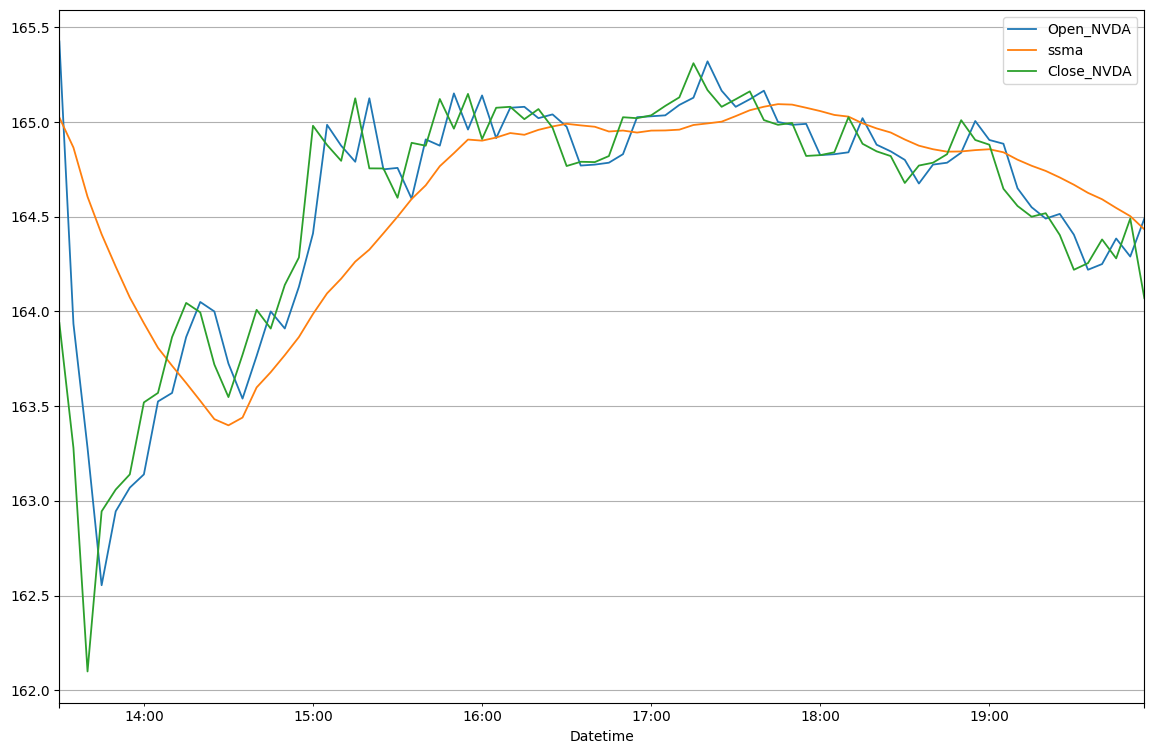

In [126]:
%matplotlib inline
# Plot the 'Open', 'High', 'Low', Close' prices for 12 May 2020
df1a.loc['14 July 2025',['Open_NVDA','ssma', 'Close_NVDA']].plot(grid = True,linewidth = 1.3, figsize = (14,9))
plt.show()

In [174]:
# Create a column called 'strategy_returns' which has the strategy returns over the backtesting period
df1a['strategy_returns'] = df1a['cc_returns'] * df1a['position']
df1a['strategy_returns'] = 1 + df1a['strategy_returns']
df1a['cc_returns'] = 1 + df1a['cc_returns']
# What are the cumulative returns in each case at the end of the period?
print('Buy and hold returns : ', np.round(df1a['cc_returns'].cumprod()[-1]-1, 2))
print('Strategy returns : ', np.round(df1a['strategy_returns'].cumprod()[-1]-1, 2))

Buy and hold returns :  0.23
Strategy returns :  0.12


#### The returns from Buy and Hold Strategy is: 23%
#### The returns from the moving average returns is: 12% 


In [151]:
print(df1a.head())
print(df1a.tail())

                            Open_NVDA  Close_NVDA  Adj Close_NVDA  cc_returns  \
Datetime                                                                        
2025-06-09 13:30:00+00:00  143.199997  144.429993      144.429993         NaN   
2025-06-09 13:35:00+00:00  144.440002  143.125000      143.125000    0.990965   
2025-06-09 13:40:00+00:00  143.130005  143.350006      143.350006    1.001572   
2025-06-09 13:45:00+00:00  143.354996  143.651398      143.651398    1.002102   
2025-06-09 13:50:00+00:00  143.649994  143.940002      143.940002    1.002009   

                           ssma  position  strategy_returns  
Datetime                                                     
2025-06-09 13:30:00+00:00   NaN       NaN               NaN  
2025-06-09 13:35:00+00:00   NaN       NaN               NaN  
2025-06-09 13:40:00+00:00   NaN       0.0               1.0  
2025-06-09 13:45:00+00:00   NaN       0.0               1.0  
2025-06-09 13:50:00+00:00   NaN       0.0               1.0 

## Ploting the cumulative and strategy returns 

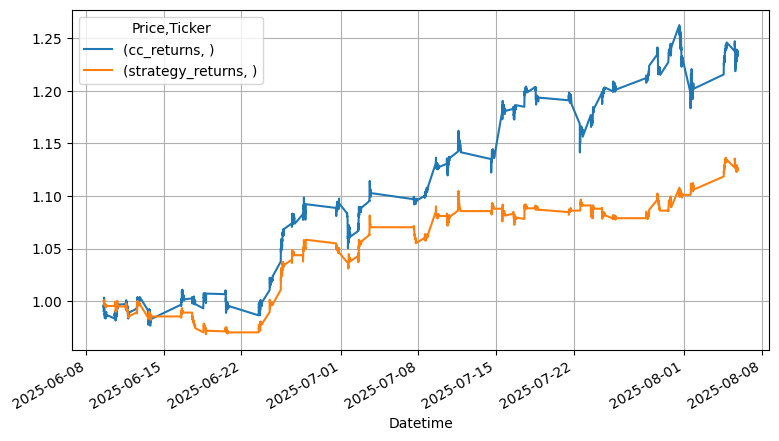

In [175]:
ax = df1a[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))
ax.figure.savefig("cumulative_returns.png", dpi=300, bbox_inches='tight')